<a href="https://colab.research.google.com/github/malphons/Project_Columbia_HFBootcamp/blob/main/Class_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- In this lecture, we will introduce the conept of neural network and test the idea on **MNIST** dataset.
- A very popular toyset to demonstrate convolutional neural network is the mnist dataset. The dataset and the description can be found at <a href=http://yann.lecun.com/exdb/mnist/>Yann LeCun's website</a>.
- It is a database of handwritten digits (0-9) that has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

### Keras
- [Keras](https://keras.io/) is a high end deep-learning library which is designed using a similar philosophy like scikit-learn. You can choose between the most popular deep learning frameworks like Tensorflow, PyTorch and JAX.
- In comparison, Tensorflow/PyTorch **offers lower-level functionality, which has a higher speed performance**.
- Keras is **less flexible in implementing modifications or new designs**.
- At this moment, Keras is the learning environment for deep learning beginners, while Tensorflow or PyTorch offers high performance.

In [ ]:
# from tensorflow import keras
import keras
import numpy as np
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
print(x_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

- Each image has 28x28 pixels so you can think about it as a 28x28 matrix.
- Each cell in the matrix is a value between $[0 ,255]$. 0 means a black pixel and 255 means a white pixel.
- The values in-between are grayscale that gives you 256 different intensities (i.e., shades of grey)

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# function to visualize data
def visualize(data, n_sample=25, size=5):
    fig = plt.figure(figsize=(10, 10))
    num = int(n_sample**0.5)
    gs = gridspec.GridSpec(num, num)
    fig.subplots_adjust(wspace=0.01, hspace=0.02)
    for i in range(num):
        for j in range(num):
            temp = data[(num*i + j)]
            ax = plt.subplot(gs[i, j])
            ax.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
            ax.axis('off')
    plt.show()

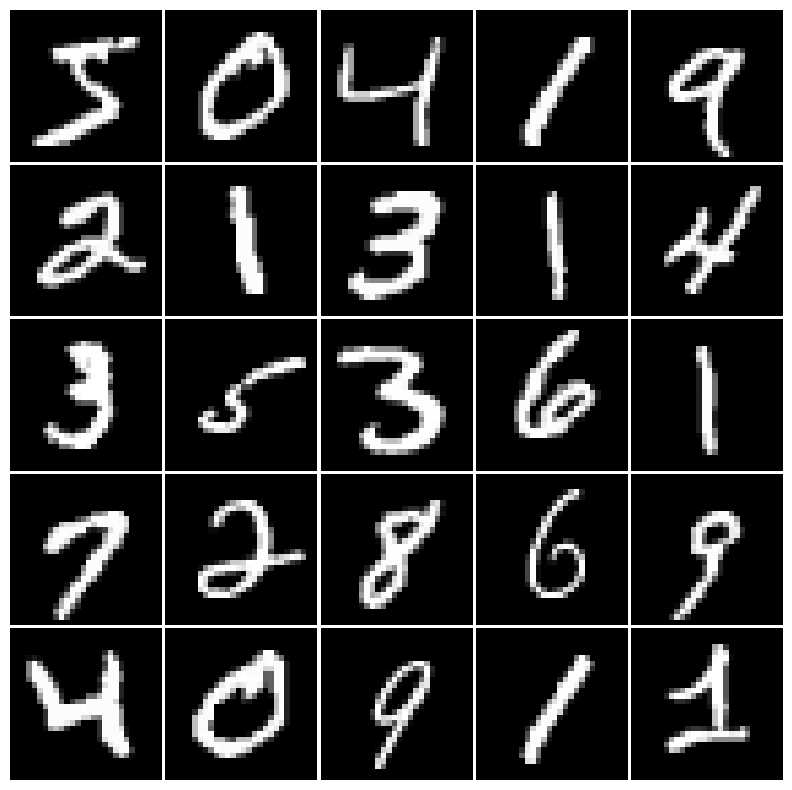

In [ ]:
visualize(x_train[:100])

### Target Label Dummification and the Softmax Mapping
- In order to train a multi-class neural network classifier, we set the network output to be $10$ dimensional. This is implicitly a **one-versus-the-rest** approach.
- Each output neuron should approximate the class probability $P(class=i|X=x)$, $0\leq i\leq 9$.
- For a binary classifier, the output $(P(class=0|X=x), P(class=1|X=x))$ are two probability functions in the range $[0,1]$ such that
$P(class=0|X=x)+P(class=1|X=x)=1$.

- For multiclass classification, we expect the output to be the $K$-tuple of class probabilities,
$(P(class=0|X=x), \cdots,P(class=K-1|X=x))$ such that $\sum_{i=0}^{i=K-1}P(class=i|X=x)=1$.


- This property is achieved by introducing a generalization of sigmoid function, called **softmax** mapping.

- For ${\bf x}= (x_1, x_2, x_3, \cdots, x_K)$, **softmax(x)** is described by the algebraic formula

$$({e^{x_1}\over \sum_i e^{x_i}}, \cdots, {e^{x_K}\over \sum_i e^{x_i}}).$$

Preprocessing
- Scale the image pixel values to the $[0, 1]$ range as we discussed that neural network prefers small and "constant"(unit variance) inputs.
- We will need to transform the integer labels to multiple-binary labels, through the procedure known as **dummification**.
- We have made use of the concept **dummification** extensively in categorical features.

In [ ]:
from tensorflow import keras
import numpy as np
# Model / data parameters
num_classes = 10

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
print('y_train shape after dummification:', y_train.shape)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
y_train shape after dummification: (60000, 10)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### How to deal with image data

- The toy dataset we used for the logistic regression example was only 2D (200x2) but now we are dealing with 3D (60,000x28x28)
- We will flatten the image matrix to a row vector (1x784) so input becomes (60,000x784)

In [ ]:
images_train = x_train.reshape(-1,784)
labels_train = y_train
images_test = x_test.reshape(-1,784)
labels_test = y_test

In [ ]:
images_train.shape

(60000, 784)

In [ ]:
from keras import layers

model = keras.Sequential(
          [
            keras.Input(shape=(784, )),
            layers.Dense(256, activation='relu', name='layer_1'),
            layers.Dense(128, activation='relu', name='layer_2'),
            layers.Dense(64, activation='relu', name='layer_3'),
            layers.Dense(10, activation='softmax', name='output'),
          ]
        )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


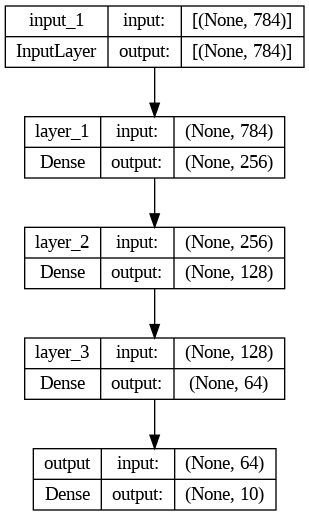

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

### Stochastic Gradient Descent

- With our current approach, we are updating all the weights only once during each epoch, which causes the weights converge slowly.
- Another reason is due to the size of image. Most cameras on the cell phone has a resolution of $4032\times3024$ pixels and with 3 channels for color image (RGB), the input dimensions would be $4032\times3024\times3 = 36,578,304$. Each node connected to the input layers will add $36,578,304$ weights, which is simply not practical to use a fully connected layer with this dimensions.
- **tensorflow** allows the algorithm to train based on a **mini-batch** fashion, thus making it **stochastic** gradient descent.
- To make it a stochastic gradient descent algorithm, we need to re-shuffle the training samples after each epoch
 - Imagine your last few minibatch labels indeed have more noise. Then these batches will pull the final learned weights in the wrong direction. If you shuffle every time, the chances of last few batches being disproportionately noisy goes down.
- Batch sizes are often a factor 2: $16, 32, 64, \cdots$

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.1)

model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=["accuracy"]
)

# Fit the model
model.fit(images_train, labels_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
score = model.evaluate(images_test, labels_test)

print(score)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2584 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0685 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0378 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0311 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0192 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0934

### Which Hand-Written Digits are Mis-Classified?
- We investigate the train set and test set mis-classifications.

1875/1875 [==============================] - 4s 2ms/step


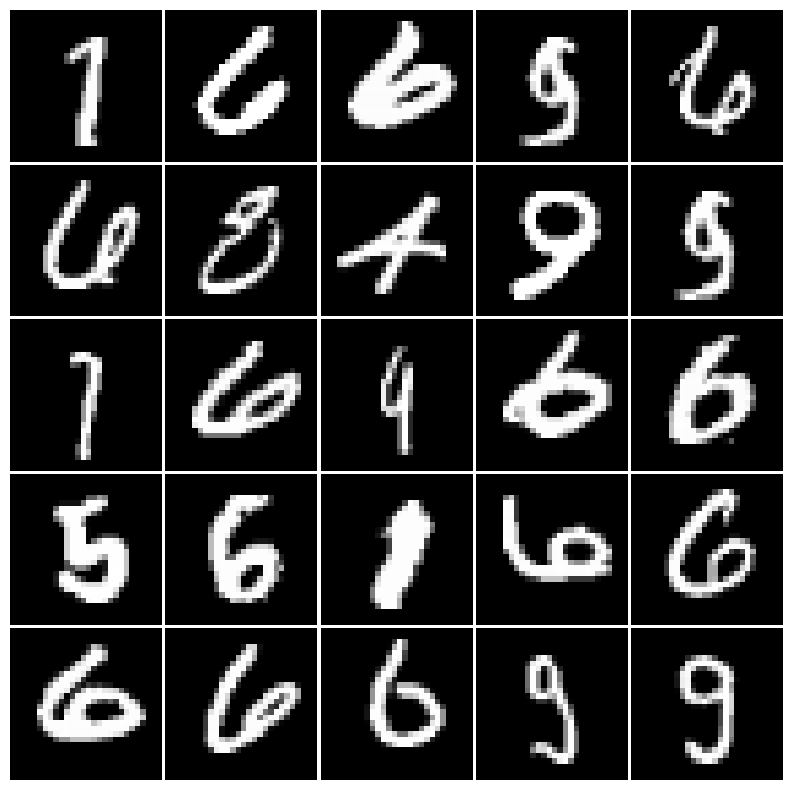

In [ ]:
import pandas as pd
predict_train = np.argmax(model.predict(images_train), 1)
incorrect_indices = predict_train != np.argmax(labels_train, 1)
incorrect_images  = x_train[incorrect_indices]
random_samples    = np.random.choice(incorrect_images.shape[0], 25)
visualize(incorrect_images[random_samples])